#              ASHRAE ENERGY PREDICTION III:

# 1.Business Problem :

## 1.1 Description :

ASHRAE,American Society of Heating and Air-Conditioning Engineers founded in 1894, focuses on building systems, energy efficiency, indoor air quality, refrigeration and sustainability within the industry. 
They have conducted three competitions so far on Energy Consumption.
The main goal of these competitions is to predict the energy consumption of coming years for better investments on energy efficiency.
They launched their third competition on october 2019. In this competition, they provided hourly cosumption of four different energies of 1443 buildings in 16 different sites in  an year.
They asked contestants to predict hourly consumption of these energies for next two years.


## 1.2 Problem Statement :

Predicting energy meter reading of a building.Where each building has four different energy meters.( meter 0 :Electricity , 1 : Chilled Water , 2 : steam, 3: Hotwater ) . By predicting
energy reading(hourly) , we can find out the energy efficiency of a building by taking the difference between pre retrofit and post retrofit.

The task at hand is to predict the energy consumption of a building in next two years with given specifications of building,weather data and meter-reading of the previous year.
This prediction gives investors  a brief idea on which investments to make to reduce costs and improve efficiency by using cutting edge technology like ML , DL and any statistical methods.


<h2> 1.3 Sources/Useful Links</h2>

1. winner's approach : https://www.kaggle.com/c/ashrae-energy-prediction/discussion/127086
2. Kaggle Competition : https://www.kaggle.com/c/ashrae-energy-prediction/overview
3. Blog1 : https://towardsdatascience.com/estimating-counterfactual-energy-usage-of-buildings-with-machine-learning-8ca91ec66c08

<h2>1.4 Real world/Business Objectives and Constraints </h2>

1. The cost of a mis-classification can be very high.
2. No strict latency concerns.
3. Interpretability is important.

<h1>2. Machine Learning Probelm </h1>

<h2> 2.1 Data </h2>


Train.csv :
building_id : There are 1443 different buildings and an id is associated with it.
meter : There are four different energies 
1. meter 0 :  Electricity
2. meter 1 : chilled water 
3. meter 2 : steam
4. meter 3 : hotwater
timestamp : Hourly consumption of these four energies(Date and time).
meter_reading : Energy usage and indication of these meters.

Weather.csv :
site id : 16 different sites and an id is associated with it.
timestamp : Hourly consumption of these four energies.
airtemperature : Degrees Celsius 
cloud_coverage : Portion of the sky covered in clouds, in oktas
dew_temperature : Degrees Celsius
precip_depth_1_hr : Millimeters
sea_level_pressure : Millibar/hectopascals
wind_direction : Compass direction (0-360)
wind_speed : Meters per second

building_metadata :
site id : 16 different sites and an id is associated with it.
building_id : There are 1443 different buildings and an id is associated with it.
primary_use - Indicator of the primary category of activities for the building based on EnergyStar property type definitions
square_feet - Gross floor area of the building
year_built - Year in which building was opened
floorcount - Number of floors in building.

test.csv :
row_id : id of rows
building_id : There are 1443 different buildings and an id is associated with it.
meter : There are four different energy meters.
timestamp : Hourly consumption of these four energies (date and time).


<h2> 2.2 Mapping the real world problem to an ML problem </h2>

<h3> 2.2.1 Type of Machine Leaning Problem </h3>

<p> It is a Regression problem, given meter type used and weather of a building predict the meter reading </p>

<h3> 2.2.2 Performance Metric </h3>

Source: https://www.kaggle.com/c/ashrae-energy-prediction/overview/evaluation \
why? https://www.kaggle.com/c/ashrae-energy-prediction/discussion/113064

<h1>3. Exploratory Data Analysis </h1>

# **Reading Data :**

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/ashrae-energy-prediction/weather_train.csv
/kaggle/input/ashrae-energy-prediction/sample_submission.csv
/kaggle/input/ashrae-energy-prediction/test.csv
/kaggle/input/ashrae-energy-prediction/train.csv
/kaggle/input/ashrae-energy-prediction/weather_test.csv
/kaggle/input/ashrae-energy-prediction/building_metadata.csv


In [2]:
!pip install windrose

In [3]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from windrose import WindroseAxes# For visualization of wind direction and wind speed
import matplotlib.cm as cm
import numpy as np
from IPython.core.pylabtools import figsize
import statistics 
import warnings
warnings.filterwarnings("ignore")

/opt/conda/lib/python3.7/site-packages/windrose/windrose.py:29: MatplotlibDeprecationWarning: 
The Appender class was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  addendum = docstring.Appender(msg, "\n\n")
/opt/conda/lib/python3.7/site-packages/windrose/windrose.py:30: MatplotlibDeprecationWarning: 
The copy_dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use docstring.copy() and cbook.dedent() instead.
  return lambda func: addendum(docstring.copy_dedent(base)(func))
/opt/conda/lib/python3.7/site-packages/windrose/windrose.py:30: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.getdoc() instead.
  return lambda func: addendum(docstring.copy_dedent(base)(func))
/opt/conda/lib/python3.7/site-packages/windrose/windrose.py:30: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  retu

### train data :

In [4]:
df_train = pd.read_csv("/kaggle/input/ashrae-energy-prediction/train.csv")
df_train.head(5)

,building_id,meter,timestamp,meter_reading
0,0,0,2016-01-01 00:00:00,0.0
1,1,0,2016-01-01 00:00:00,0.0
2,2,0,2016-01-01 00:00:00,0.0
3,3,0,2016-01-01 00:00:00,0.0
4,4,0,2016-01-01 00:00:00,0.0


In [5]:
df_train.describe()

,building_id,meter,meter_reading
count,2.021610e+07,2.021610e+07,2.021610e+07
mean,7.992780e+02,6.624412e-01,2.117121e+03
std,4.269133e+02,9.309921e-01,1.532356e+05
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.930000e+02,0.000000e+00,1.830000e+01
50%,8.950000e+02,0.000000e+00,7.877500e+01
75%,1.179000e+03,1.000000e+00,2.679840e+02
max,1.448000e+03,3.000000e+00,2.190470e+07


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20216100 entries, 0 to 20216099
Data columns (total 4 columns):
 #   Column         Dtype  
---  ------         -----  
 0   building_id    int64  
 1   meter          int64  
 2   timestamp      object 
 3   meter_reading  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 616.9+ MB


### test data :

In [7]:
df_test = pd.read_csv("/kaggle/input/ashrae-energy-prediction/test.csv")
df_test.head()

,row_id,building_id,meter,timestamp
0,0,0,0,2017-01-01 00:00:00
1,1,1,0,2017-01-01 00:00:00
2,2,2,0,2017-01-01 00:00:00
3,3,3,0,2017-01-01 00:00:00
4,4,4,0,2017-01-01 00:00:00


### Weather train data :

In [8]:
df_weather_train = pd.read_csv("/kaggle/input/ashrae-energy-prediction/weather_train.csv")
df_weather_train.head()

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2016-01-01 00:00:00,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
1,0,2016-01-01 01:00:00,24.4,NaN,21.1,-1.0,1020.2,70.0,1.5
2,0,2016-01-01 02:00:00,22.8,2.0,21.1,0.0,1020.2,0.0,0.0
3,0,2016-01-01 03:00:00,21.1,2.0,20.6,0.0,1020.1,0.0,0.0
4,0,2016-01-01 04:00:00,20.0,2.0,20.0,-1.0,1020.0,250.0,2.6


In [9]:
df_weather_train.describe()

,site_id,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
count,139773.000000,139718.000000,70600.000000,139660.000000,89484.000000,129155.000000,133505.000000,139469.000000
mean,7.478977,14.418106,2.149306,7.350158,0.983047,1016.158038,180.526632,3.560527
std,4.604744,10.626595,2.599150,9.790235,8.463678,7.629684,111.523629,2.335874
min,0.000000,-28.900000,0.000000,-35.000000,-1.000000,968.200000,0.000000,0.000000
25%,3.000000,7.200000,0.000000,0.600000,0.000000,1011.800000,80.000000,2.100000
50%,7.000000,15.000000,2.000000,8.300000,0.000000,1016.400000,190.000000,3.100000
75%,11.000000,22.200000,4.000000,14.400000,0.000000,1020.800000,280.000000,5.000000
max,15.000000,47.200000,9.000000,26.100000,343.000000,1045.500000,360.000000,19.000000


### Weather test data :

In [10]:
df_weather_test = pd.read_csv("/kaggle/input/ashrae-energy-prediction/weather_test.csv")
df_weather_test.head()

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2017-01-01 00:00:00,17.8,4.0,11.7,NaN,1021.4,100.0,3.6
1,0,2017-01-01 01:00:00,17.8,2.0,12.8,0.0,1022.0,130.0,3.1
2,0,2017-01-01 02:00:00,16.1,0.0,12.8,0.0,1021.9,140.0,3.1
3,0,2017-01-01 03:00:00,17.2,0.0,13.3,0.0,1022.2,140.0,3.1
4,0,2017-01-01 04:00:00,16.7,2.0,13.3,0.0,1022.3,130.0,2.6


### Building meta data :

In [11]:
df_building = pd.read_csv("/kaggle/input/ashrae-energy-prediction/building_metadata.csv")
df_building.head()

,site_id,building_id,primary_use,square_feet,year_built,floor_count
0,0,0,Education,7432,2008.0,NaN
1,0,1,Education,2720,2004.0,NaN
2,0,2,Education,5376,1991.0,NaN
3,0,3,Education,23685,2002.0,NaN
4,0,4,Education,116607,1975.0,NaN


In [12]:
df_building.describe()

,site_id,building_id,square_feet,year_built,floor_count
count,1449.000000,1449.000000,1449.000000,675.000000,355.000000
mean,6.952381,724.000000,92111.776398,1967.957037,3.740845
std,5.003432,418.434583,110769.950997,31.054030,3.333683
min,0.000000,0.000000,283.000000,1900.000000,1.000000
25%,3.000000,362.000000,23012.000000,1949.000000,1.000000
50%,5.000000,724.000000,57673.000000,1970.000000,3.000000
75%,13.000000,1086.000000,115676.000000,1995.000000,5.000000
max,15.000000,1448.000000,875000.000000,2017.000000,26.000000


## Reducing Memory :

In [13]:
## Function to reduce the DF size
#https://www.kaggle.com/caesarlupum/ashrae-start-here-a-gentle-introduction
def memory_reduction(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum()/1024**2   
    for column in df.columns:
        column_type = df[column].dtypes  # data type of each cloumn
        if column_type in numerics:
            c_min = df[column].min()  #minimum value in column
            c_max = df[column].max()#maximum value in column
            if str(column_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[column] = df[column].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[column] = df[column].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[column] = df[column].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[column] = df[column].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[column] = df[column].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[column] = df[column].astype(np.float32)
                else:
                    df[column] = df[column].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('size of the memory is reduced to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [14]:
df_train = memory_reduction(df_train)
df_test = memory_reduction(df_test)

df_weather_train = memory_reduction(df_weather_train)
df_weather_test = memory_reduction(df_weather_test)
df_building = memory_reduction(df_building)

size of the memory is reduced to 289.19 Mb (53.1% reduction)
size of the memory is reduced to 596.49 Mb (53.1% reduction)
size of the memory is reduced to  3.07 Mb (68.1% reduction)
size of the memory is reduced to  6.08 Mb (68.1% reduction)
size of the memory is reduced to  0.03 Mb (60.3% reduction)


# EDA :

In [15]:
df_meter = df_train.groupby('meter')['building_id'].nunique()# number of unique building id's
for i in range(4) :
    print("Number of buildings with meter",i," : ",df_meter[i])

Number of buildings with meter 0  :  1413
Number of buildings with meter 1  :  498
Number of buildings with meter 2  :  324
Number of buildings with meter 3  :  145


In [16]:
print("number of unique bulilding id's :",df_train['building_id'].nunique())

number of unique bulilding id's : 1449


### plotting meter-reading of a building for whole year with one meter

### Checking Manually for any Noise :

In [17]:
def whole_year_reading(building_id,meter) :
    # This function is for checking the noise manually for any noise in a building with a specific meter
    p2 = df_train.query(f'building_id == {building_id} and meter=={meter}')# retrieve index of one meter of one building
    p2["day"] = pd.to_datetime(p2["timestamp"]).dt.dayofyear # getting day of a year using timestamp
    p21=p2.groupby(["day"])["meter_reading"].sum()
    k = 'meter reading of a building with meter ' + str(meter)
    p21.astype('float')
    plt.figure(figsize=(16,8))
    plt.title(k)
    plt.xlabel('timestamp in days')
    #plt.xticks(rotation='vertical')
    plt.ylabel('meter_reading')
    #plt.xlim(0,240)
    plt.plot(p21)
    return p2


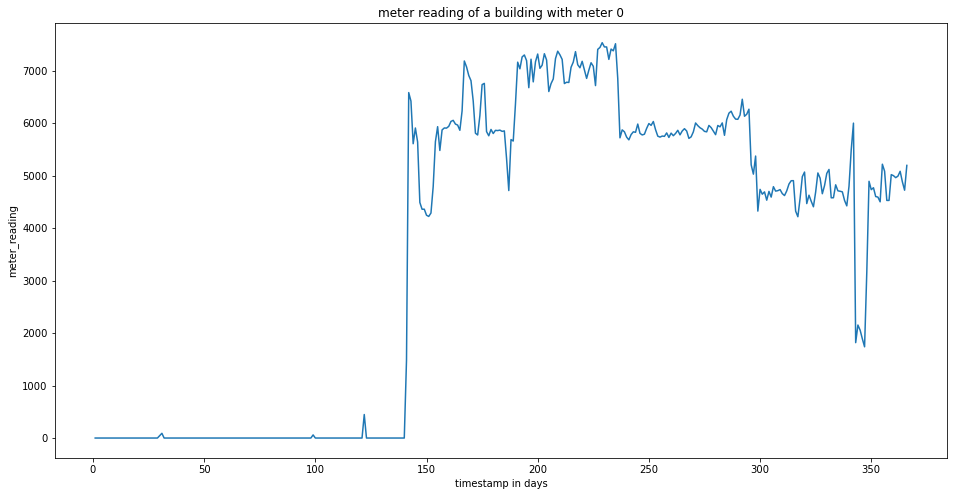

In [18]:
id_building = 0#mention building id
meter_type = 0# mention meter type
q = whole_year_reading(id_building,meter_type)

Building id0 meter reading of electricity meter is changing from 150 days to 365 days but first 150 days there are no readings.


## meter wise analysis :

### meter 0 : Electricity

In [19]:
def reading_of_onemeter(meter) :
    # This function gives meter reading of one meter of whole year
    p2 = df_train.query(f'meter=={meter}')# getting readings of one specific meter
    p2["day"] = pd.to_datetime(p2["timestamp"]).dt.dayofyear # converting timestamp to day of a year
    p21=p2.groupby(["day"])["meter_reading"].mean()
    k = 'meter reading of all building with meter ' + str(meter)
    p21.astype('float')
    plt.figure(figsize=(16,8))
    plt.title(k)
    plt.xlabel('timestamp in days')
    #plt.xticks(rotation='vertical')
    plt.ylabel('meter_reading')
    #plt.xlim(0,24)
    plt.plot(p21)
    return p2


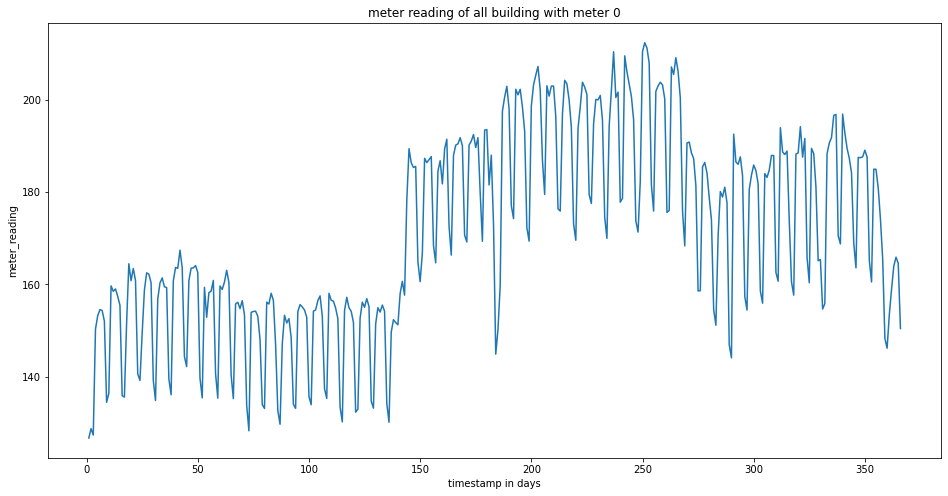

In [20]:
q2 = reading_of_onemeter(0)

The electricity meter reading is changing from 130kWh to 220kWh.
for first 150 days electricity consumption is less compared to next 150 days.


## meter 1 : chilled water

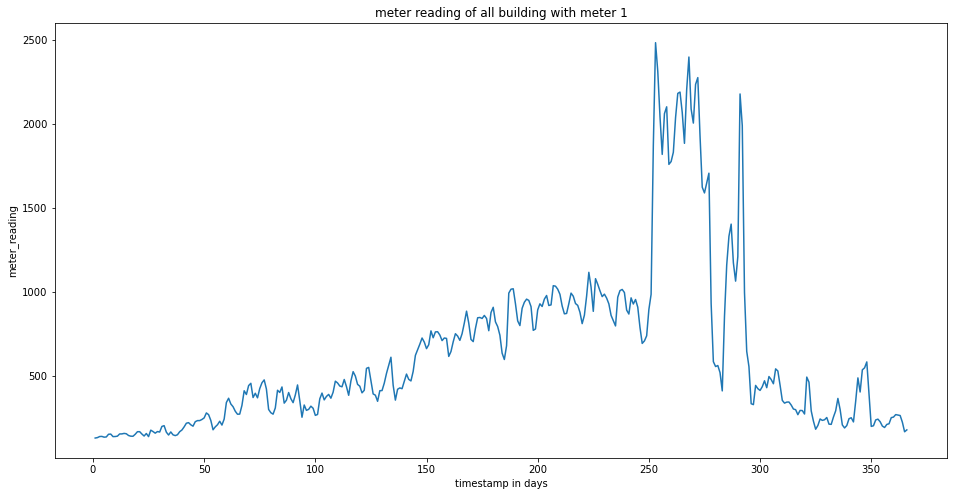

In [21]:
q2 = reading_of_onemeter(1)

1. chilled water consumption distribution is different from elctricity consumption.
2. chilled water consumption is more during 250th to 300th day of a year.
3. Normally chilled water consumption varies from 250kWh to 2500kWh.

## meter 2 : Steam 

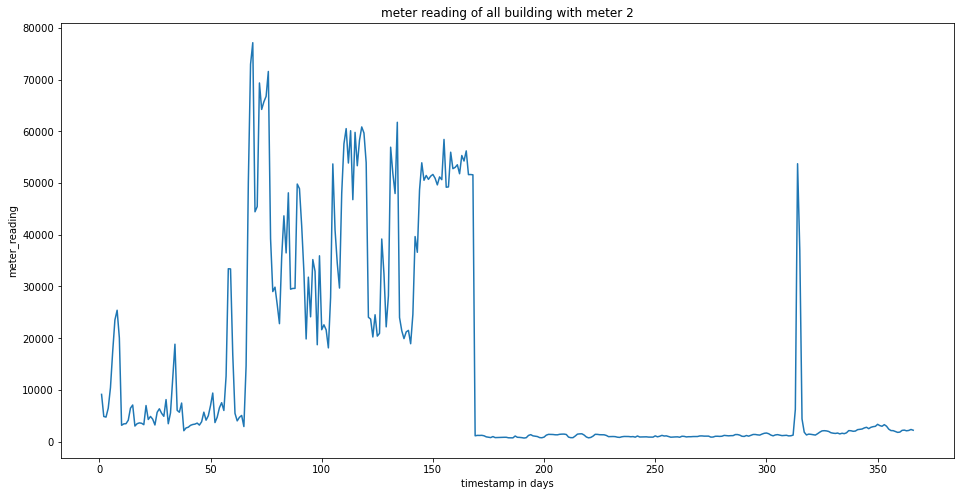

In [22]:
q2 = reading_of_onemeter(2)

1. steam consumption is more during first 150 days and also during 320th to 330th day in year 2016.
2. steam consumption is varying from 10MWh to 80MWh.
3. The energy consumption of steam is more compared to other energy consumptions.

## meter 3 : Hot water 

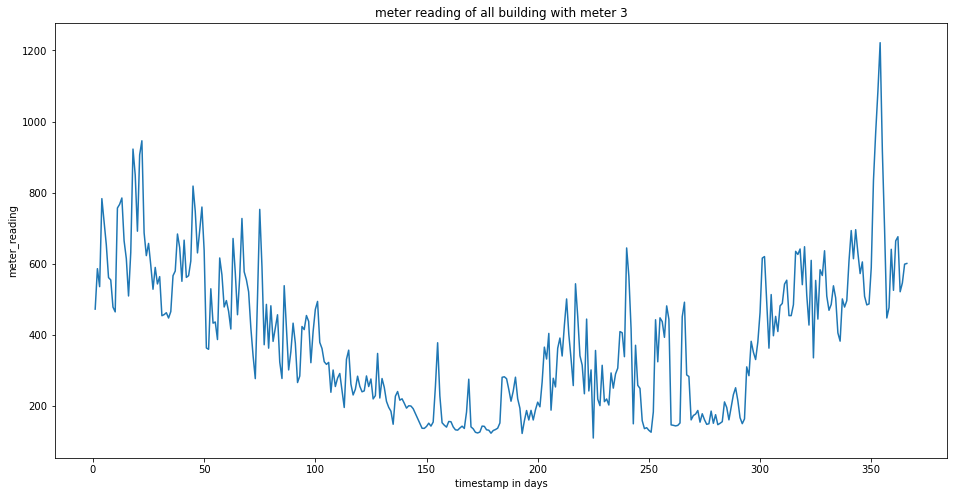

In [23]:
q2 = reading_of_onemeter(3)

1. Hot water consumption is less during summer i.e 100th day to 200th day and more during other seasons.
2. Hot water consumption varies normally from 100kWh to 800kWh.


## Distribution of meter reading in train data:

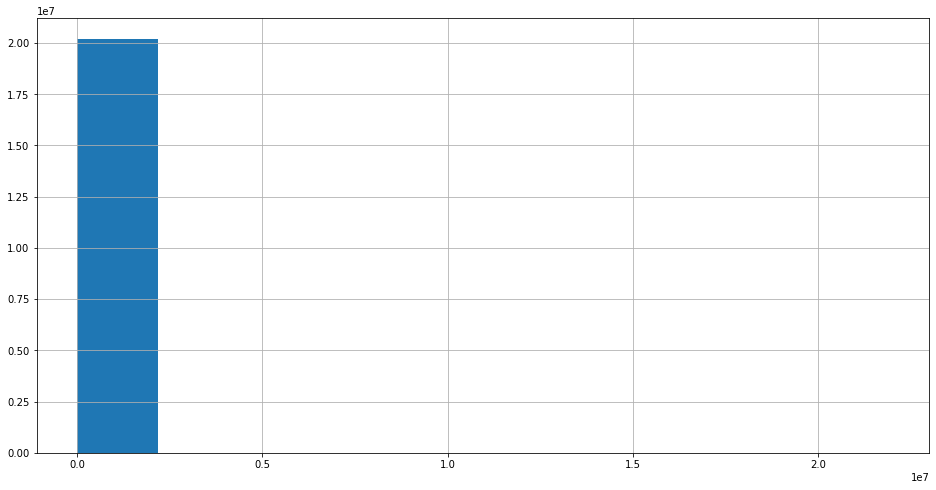

In [24]:
df_train['meter_reading'].hist(figsize=(16, 8))

Most of the values of meter_reading which is target variable distributed around zero.

Text(0.5, 1.0, 'Density of Logartihm(Meter Reading + 1) Among Different Meters')

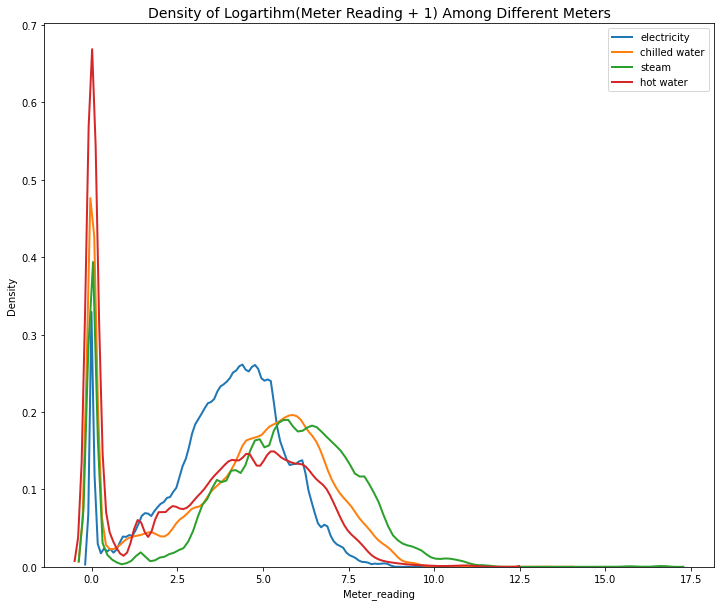

In [25]:
# distribution of the meter reading in meters without zeros
#https://medium.com/towards-artificial-intelligence/ashrae-great-energy-prediction-challenge-cefab05e4f2
figsize(12,10)
#list of different meters
meters = sorted(df_train['meter'].unique().tolist())

# plot meter_reading distribution for each meter
for meter_type in meters:
    subset = df_train[df_train['meter'] == meter_type]
    sns.kdeplot(np.log1p(subset["meter_reading"]), 
                label=meter_type, linewidth=2)

# set title, legends and labels
plt.ylabel("Density")
plt.xlabel("Meter_reading")
plt.legend(['electricity', 'chilled water', 'steam', 'hot water'])
plt.title("Density of Logartihm(Meter Reading + 1) Among Different Meters", size=14)

## Meter reading of all buildings over a year :

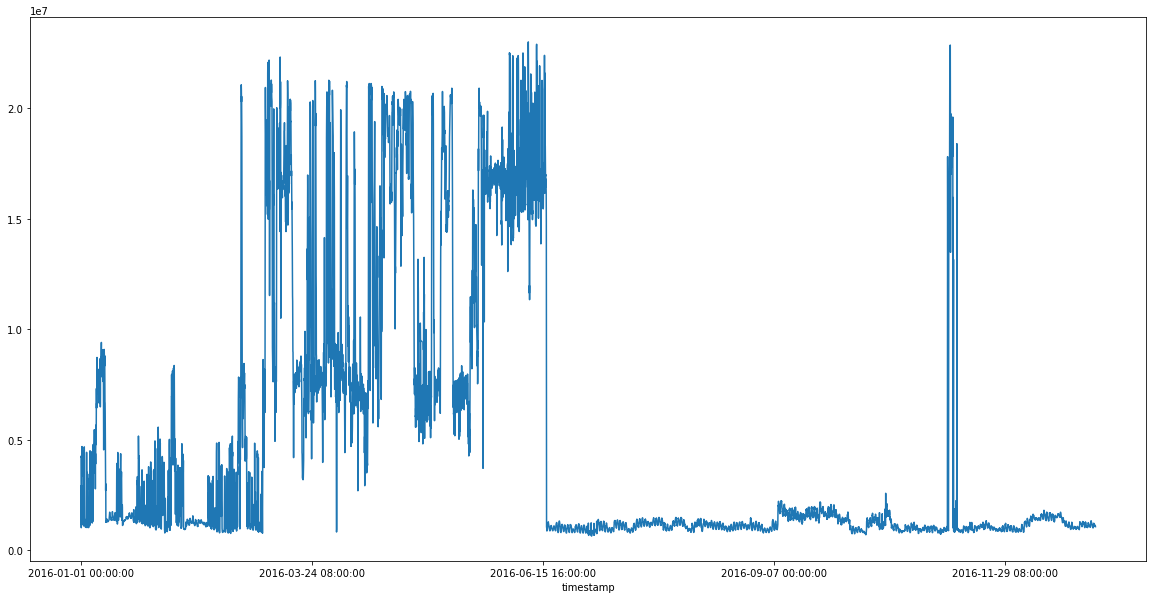

In [26]:
ts=df_train.groupby(["timestamp"])["meter_reading"].sum()
ts.astype('float')
fig,ax = plt.subplots(figsize=(20,10))
ts.plot(ax=ax, x_compat=True)
#plt.axhline(y=0.1, color='red')
#plt.axvspan(0, 905, color='green', alpha=0.1)
#plt.axvspan(906, 1505, color='red', alpha=0.1)
plt.show()

1. Meter reading is less from june 15th 2016.
2. During November again meter reading is high as before june 15th.


# Weather data analysis :

In [27]:
#https://www.kaggle.com/rishabhiitbhu/ashrae-simple-eda
#https://www.kaggle.com/lhd0430/ashrae-energy-prediction-eda
def distant_plot(feature):
    '''plot dist curves for train weather data for the given column name'''
    fig, ax = plt.subplots(figsize=(10, 10))
    sns.distplot(df_weather_train[feature].dropna(), color='grey', ax=ax).set_title(feature, fontsize=16)
    #sns.distplot(weather_test_df[column].dropna(), color='purple', ax=ax).set_title(column, fontsize=16)
    plt.xlabel(feature, fontsize=15)
    plt.legend(['train'])
    plt.show()


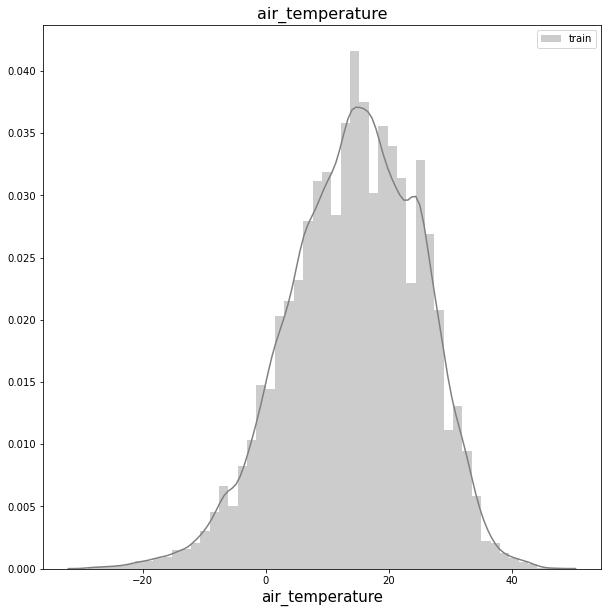

In [28]:
distant_plot('air_temperature')

Mean value of air temperature is 14.4 degree celsius. Most of the air temperature values for sites is available.

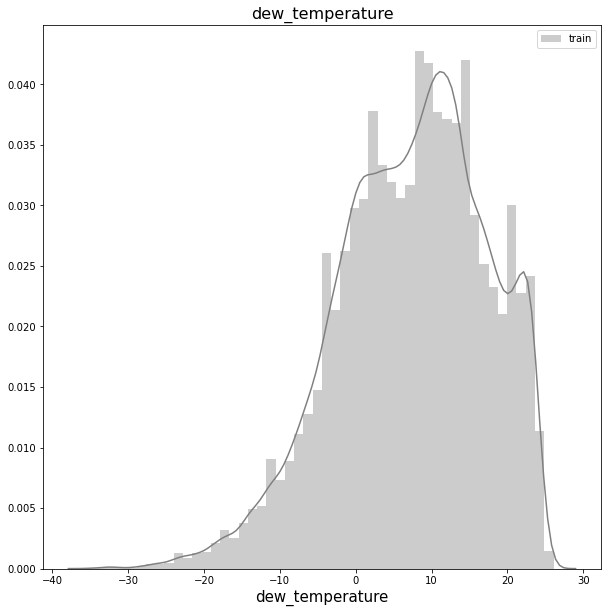

In [29]:
distant_plot('dew_temperature')

Most of dew temperature in all buildings is around 13 degree celsius.

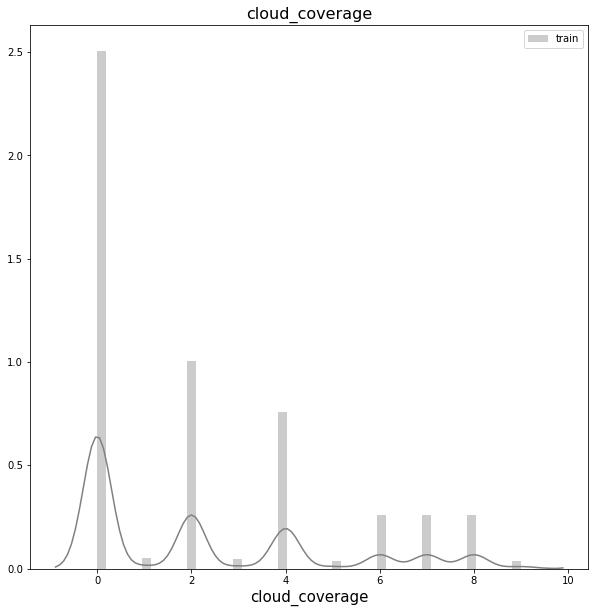

In [30]:
distant_plot('cloud_coverage')

1. cloud_coverage is measured between 0 to 9 scale.
2. zero means it is a clear sky and 9 means it is rainy.
3. Most of the data cloud_coverage value is zero and clear sky as expected.

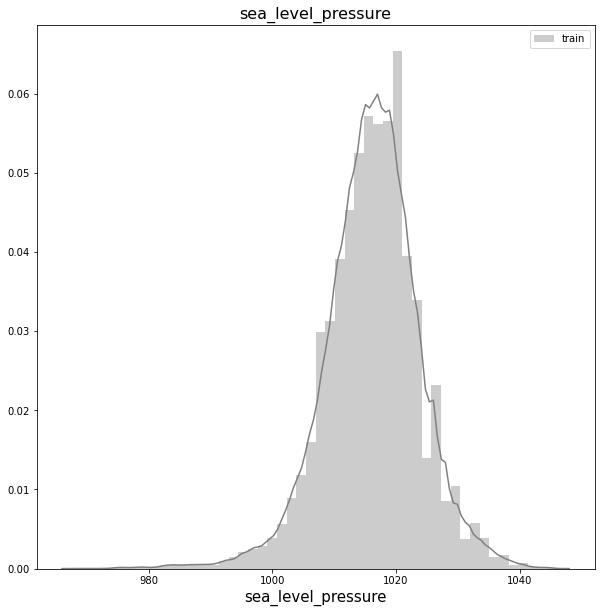

In [31]:
distant_plot('sea_level_pressure')

sea level pressure is around 1019. around 50% of data has sea level pressure of 1019.

### Windrose graph for visualization of wind direction and wind speeed

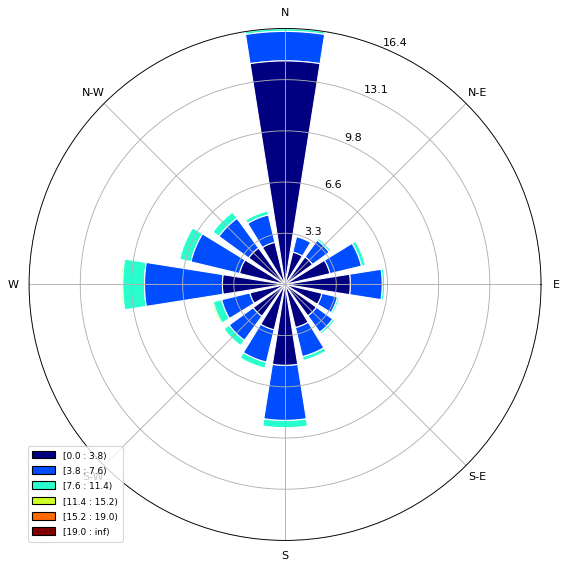

In [32]:
df1 = df_weather_train.dropna(subset=['wind_direction','wind_speed']) 
ax = WindroseAxes.from_ax()
ax.bar(df1['wind_direction'], df1['wind_speed'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend()

1. colored blocks tells us the wind speed in mph.
2. radial lines show us the wind direction.
3. There is high wind speed above 19mph in the North direction.

# Builiding data analysis :

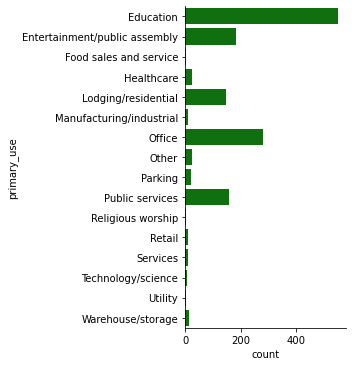

In [33]:
sns.catplot(y='primary_use',kind='count',data=df_building.sort_values('primary_use'),color='g')


1. Most of the buildings are used for education purpose as this data is collected across universities.
2. Out of 1449 buildings, 500 of them are used for education purpose only.

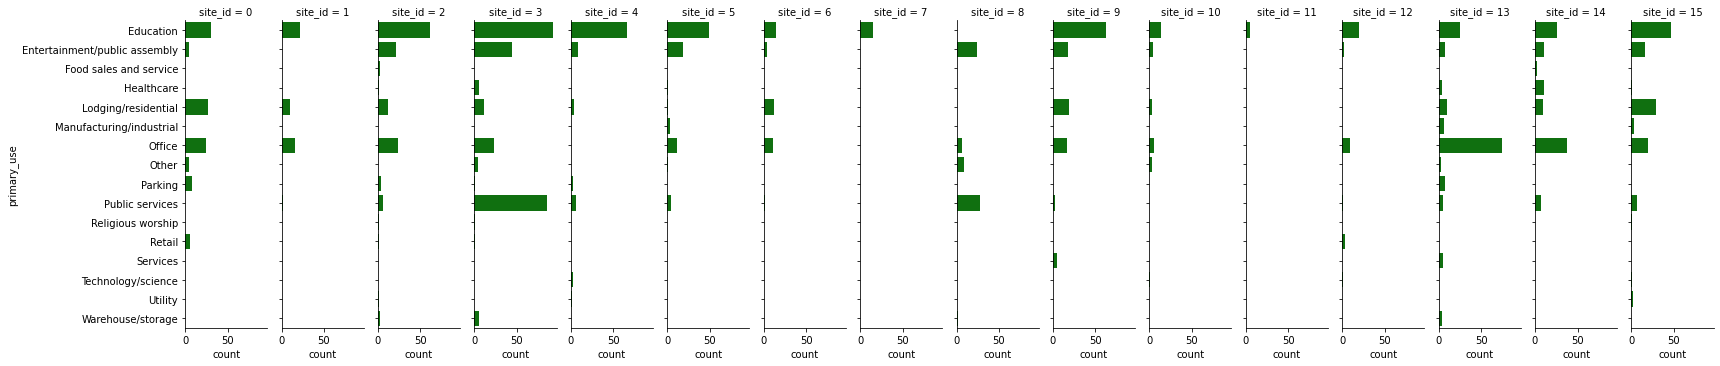

In [34]:
sns.catplot(y='primary_use',kind='count',data=df_building.sort_values('primary_use'),color='g',col='site_id',height=5,aspect=.3)
#sns.catplot(x='site_id',y='square_feet',data=df_building,kind='bar')

1. Most of sites have buildings with education purpose.
2. In site_id13, the buildings are used mostly for office purpose.
3. In site_id3, the buildings are used for public services.

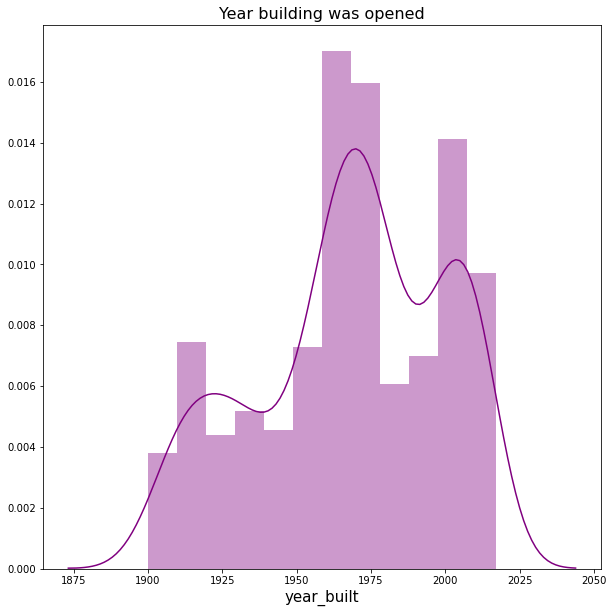

In [35]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.distplot(df_building['year_built'].dropna(), color='purple', 
             ax=ax).set_title('Year building was opened', fontsize=16)
plt.xlabel('year_built', fontsize=15)
plt.show()

1. Many buildings are built around in year 1975.

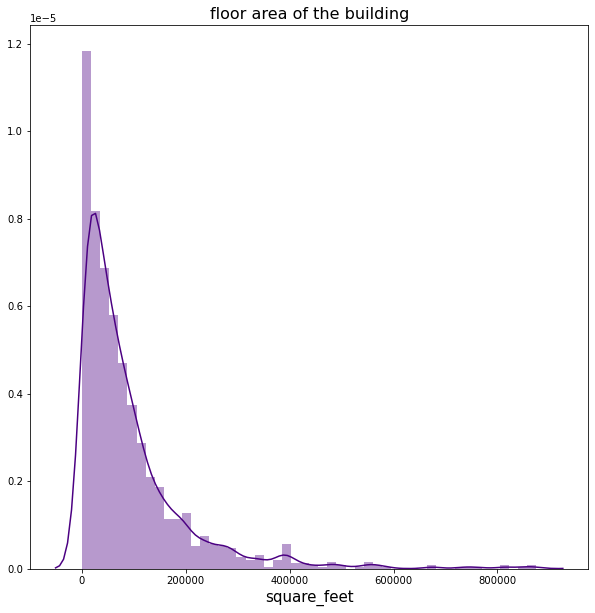

In [36]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.distplot(df_building['square_feet'], color='indigo', 
             ax=ax).set_title('floor area of the building', fontsize=16)
plt.xlabel('square_feet', fontsize=15)
plt.show()

80% of the square feet of buildings is around 100000.
Very few buildings square feet is 800000.

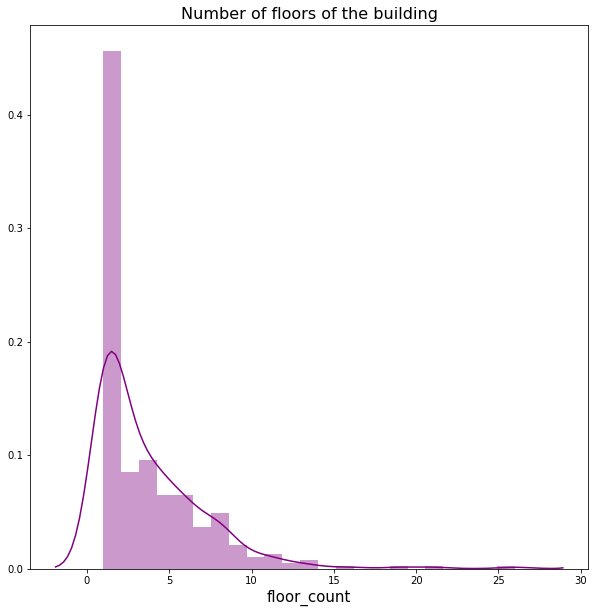

In [37]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.distplot(df_building['floor_count'].dropna(), color='purple', 
             ax=ax).set_title('Number of floors of the building', fontsize=16)
plt.xlabel('floor_count', fontsize=15)
plt.show()

Most of the buildings has only two floors and very few hav 25 floors.

## Merging data for better analysis :

In [38]:
df_train_merge = df_train.merge(df_building, how='left',on='building_id').merge(df_weather_train,how='left',on=['site_id','timestamp'])
df_train_merge.describe()

,building_id,meter,meter_reading,site_id,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
count,2.021610e+07,2.021610e+07,2.021610e+07,2.021610e+07,2.021610e+07,8088455.0,3506933.0,2.011944e+07,11390735.0,2.011596e+07,16467077.0,18984431.0,18767052.0,2.007242e+07
mean,7.992780e+02,6.624412e-01,1.988706e+03,7.992232e+00,1.077830e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,4.269133e+02,9.309921e-01,1.532159e+05,5.099060e+00,1.171424e+05,NaN,0.0,0.000000e+00,0.0,0.000000e+00,NaN,NaN,NaN,0.000000e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.830000e+02,1900.0,1.0,-2.890625e+01,0.0,-3.500000e+01,-1.0,968.0,0.0,0.000000e+00
25%,3.930000e+02,0.000000e+00,1.830000e+01,3.000000e+00,3.252700e+04,1951.0,1.0,8.601562e+00,0.0,0.000000e+00,0.0,1011.5,70.0,2.099609e+00
50%,8.950000e+02,0.000000e+00,7.877500e+01,9.000000e+00,7.270900e+04,1969.0,3.0,1.670312e+01,0.0,8.898438e+00,0.0,1016.0,180.0,3.099609e+00
75%,1.179000e+03,1.000000e+00,2.679840e+02,1.300000e+01,1.391130e+05,1993.0,6.0,2.409375e+01,4.0,1.609375e+01,0.0,1020.5,280.0,4.601562e+00
max,1.448000e+03,3.000000e+00,2.190470e+07,1.500000e+01,8.750000e+05,2017.0,26.0,4.718750e+01,9.0,2.609375e+01,343.0,1046.0,360.0,1.900000e+01


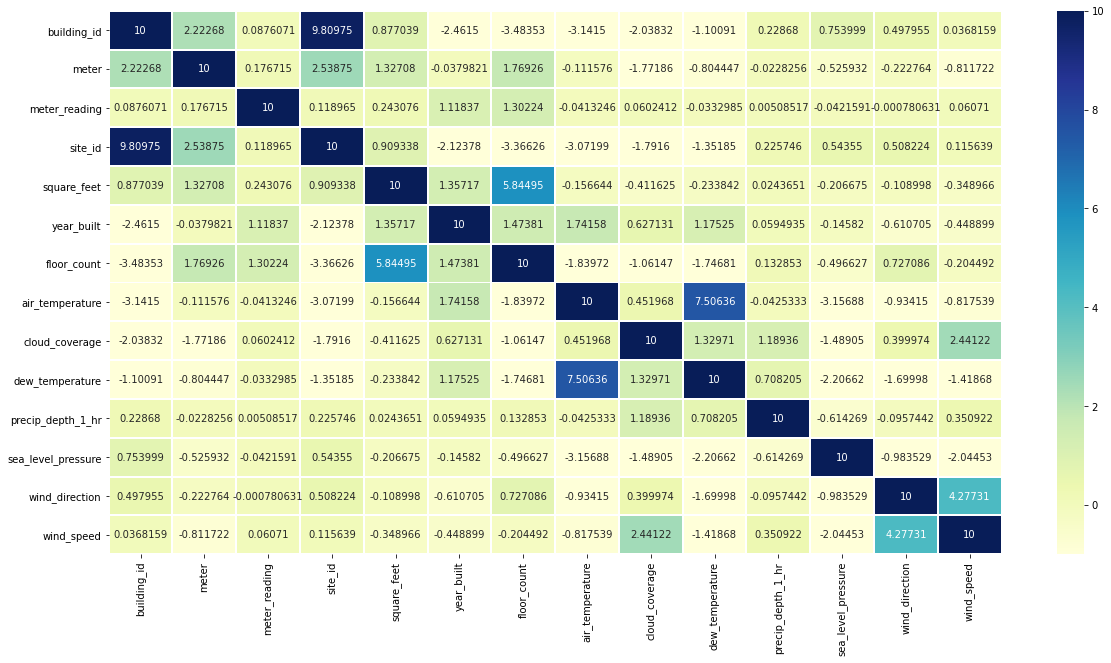

In [39]:
fig, ax = plt.subplots(figsize=(20,10)) 
sns.heatmap(df_train_merge.corr()*10,vmin=-1,vmax=10,linewidths=1,annot=True,annot_kws={"size": 10},fmt="g",ax=ax,cmap="YlGnBu")


1. building id is highly correlated with site_id
2. square feet of the building is in correlation with building_id 
3. dew temperature and air temperature are highly correlated.
4. Most of the features are less in correlation with meter reading.

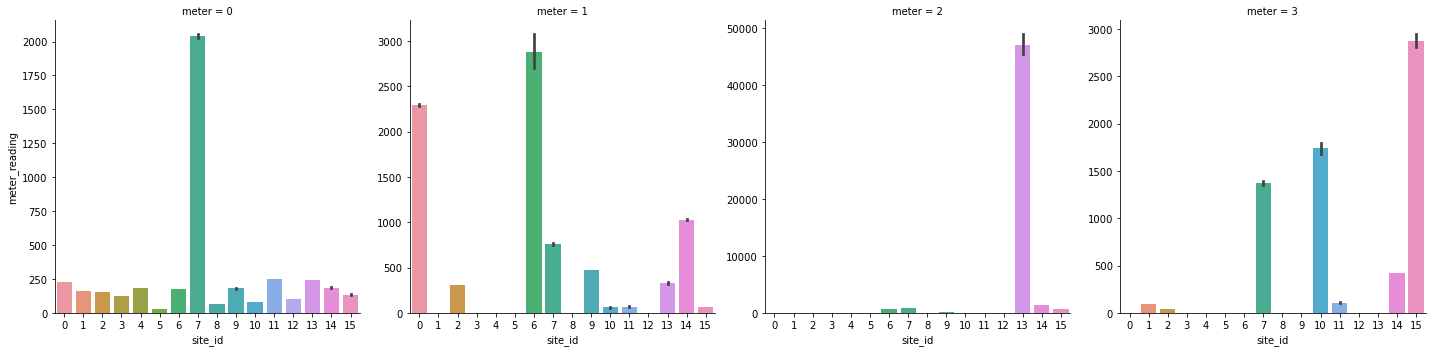

In [40]:
sns.catplot(y='meter_reading',x='site_id',data=df_train_merge,col='meter',kind='bar',sharey=False)

1. site 7 buildings has more electric meters than any other site.
2. site 1&6 has more number of chilled water meters compared to other sites.
3. Very few sites has steam consumption meter.
4. site 7,10,15 has more hot water meters


# **Missing Data** :

### In train data :

In [41]:
total = df_train.isnull().sum().sort_values(ascending = False)
percent = (df_train.isnull().sum()/df_train.isnull().count()*100).sort_values(ascending = False)
missing__train_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Missing_Percentage'])
missing__train_data.head(4)

,Total,Missing_Percentage
meter_reading,0,0.0
timestamp,0,0.0
meter,0,0.0
building_id,0,0.0


No missing values in Train data

### In Weather train data :

In [42]:
total = df_weather_train.isnull().sum().sort_values(ascending = False)
percent = (df_weather_train.isnull().sum()/df_weather_train.isnull().count()*100).sort_values(ascending = False)
missing_weather_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Missing_Percentage'])
missing_weather_data.head(9)

,Total,Missing_Percentage
cloud_coverage,69173,49.489529
precip_depth_1_hr,50289,35.979052
sea_level_pressure,10618,7.596603
wind_direction,6268,4.484414
wind_speed,304,0.217496
dew_temperature,113,0.080845
air_temperature,55,0.039350
timestamp,0,0.000000
site_id,0,0.000000


Around 50% of cloud_coverage data is missing and around 36% of precip_depth data is missing in weather train data.

### In Weather test data :

In [43]:

total = df_weather_test.isnull().sum().sort_values(ascending = False)
percent = (df_weather_test.isnull().sum()/df_weather_test.isnull().count()*100).sort_values(ascending = False)
missing_weather_test_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Missing_Percentage'])
missing_weather_test_data.head(9)

,Total,Missing_Percentage
cloud_coverage,140448,50.658808
precip_depth_1_hr,95588,34.478057
sea_level_pressure,21265,7.670167
wind_direction,12370,4.461790
wind_speed,460,0.165919
dew_temperature,327,0.117947
air_temperature,104,0.037512
timestamp,0,0.000000
site_id,0,0.000000


Around 51% of cloud coverage and 35% of precip depth data is missing in weather test data.

### In building meta data :

In [44]:

total = df_building.isnull().sum().sort_values(ascending = False)
percent = (df_building.isnull().sum()/df_building.isnull().count()*100).sort_values(ascending = False)
missing_building_meta_df  = pd.concat([total, percent], axis=1, keys=['Total', 'Missing_Percentage'])
missing_building_meta_df.head(6)

,Total,Missing_Percentage
floor_count,1094,75.500345
year_built,774,53.416149
square_feet,0,0.000000
primary_use,0,0.000000
building_id,0,0.000000
site_id,0,0.000000


suprisingly 75% of floor_count data is missing in building meta data!
Around 53% of year_built data is missing.

# Each building consumption :

In [45]:

def each_building_consumption() : 
    'This function building energy consumption of all meters '
    p21=df_train.groupby(["building_id"])["meter_reading"].sum()
    k = 'consumption of each building '
    p21.astype('float')
    plt.figure(figsize=(16,8))
    plt.title(k)
    plt.xlabel('building id')
    #plt.xticks(rotation='vertical')
    plt.ylabel('meter_reading')
    #plt.xlim(700,1440)
    plt.plot(p21)
    return p21


# Outliers :

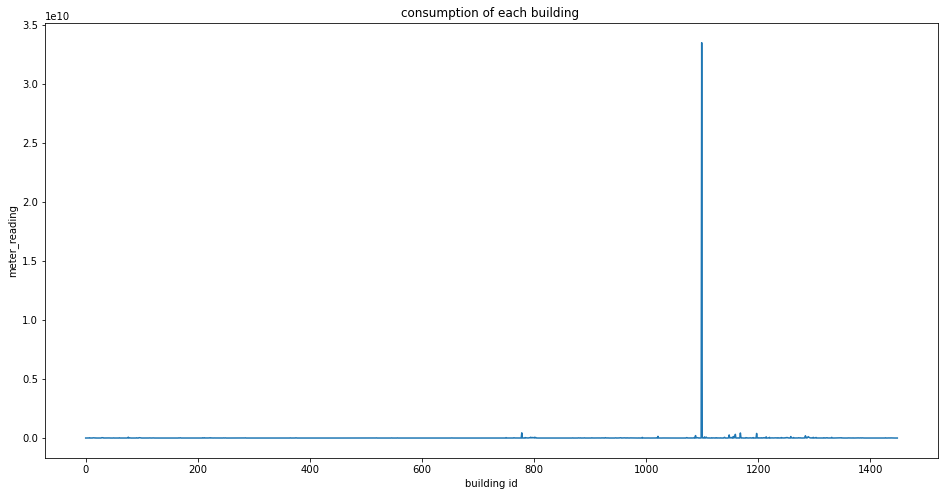

In [46]:
#https://www.kaggle.com/c/ashrae-energy-prediction/discussion/122471
k = each_building_consumption()

It can be observed that 1099 building_id meter reading values are high.

## Plot of buildingId 1099 :

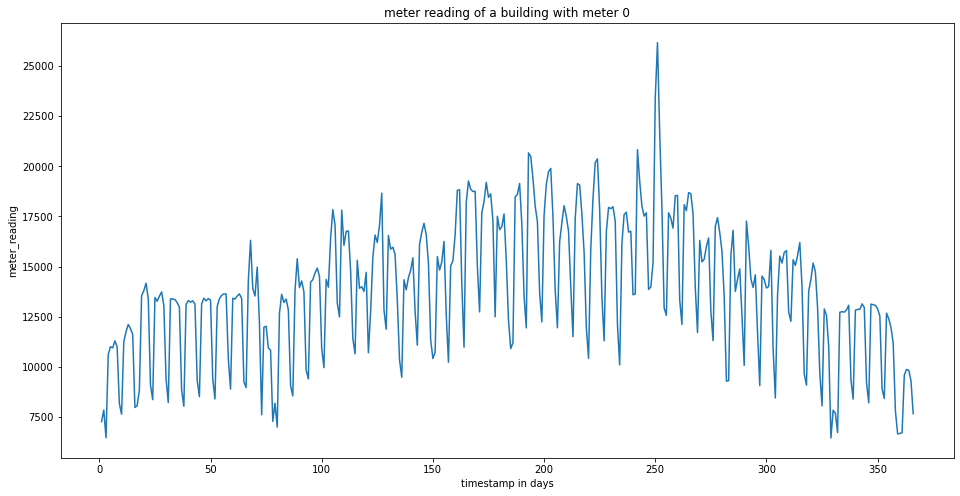

In [47]:
id_building = 1099#mention building id
meter_type = 0# mention meter type
q = whole_year_reading(id_building,meter_type)

The meter reading values of building_id 1099 is too high, which will be counted as outlier.

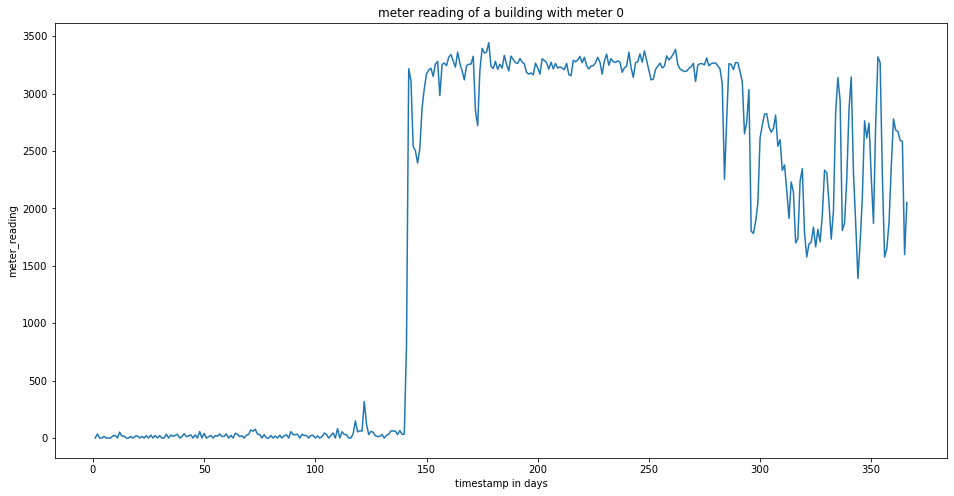

In [48]:
id_building = 1#mention building id
meter_type = 0# mention meter type
q = whole_year_reading(id_building,meter_type)

building 1 meter reading values for first 143 days is zero. 

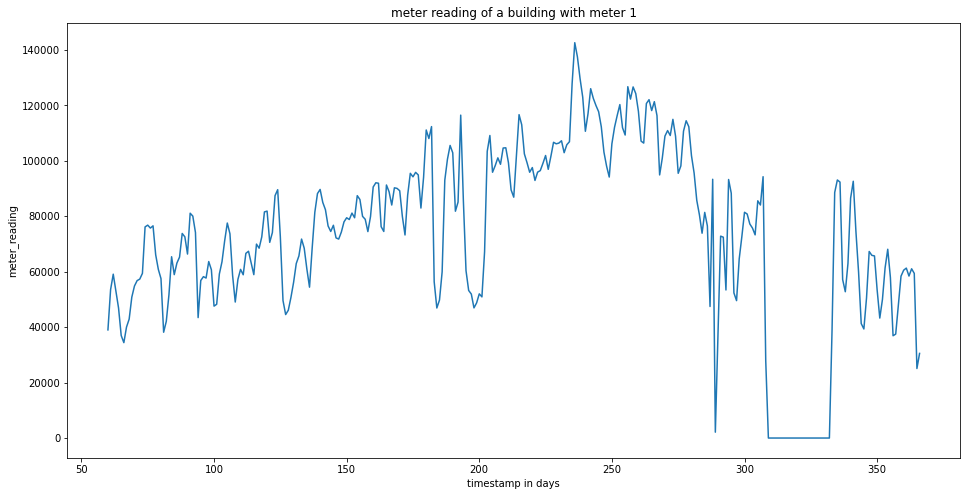

In [49]:
id_building = 7#mention building id
meter_type = 1# mention meter type
q = whole_year_reading(id_building,meter_type)

The meter reading values is zero from 310 to 330 days of building7(chilled water meter).

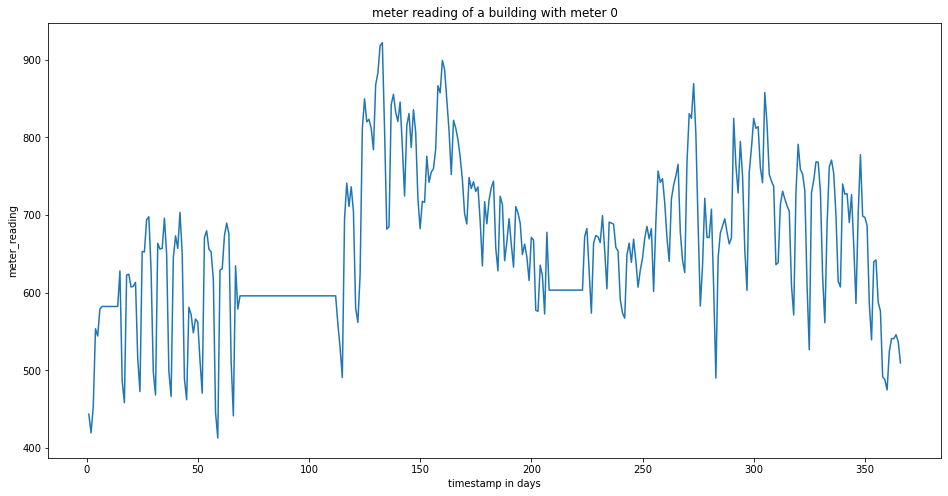

In [50]:
id_building = 145#mention building id
meter_type = 0# mention meter type
q = whole_year_reading(id_building,meter_type)

The constant value of meter reading(building id = 145)from 70 to 110 days and 210 to 220 days.

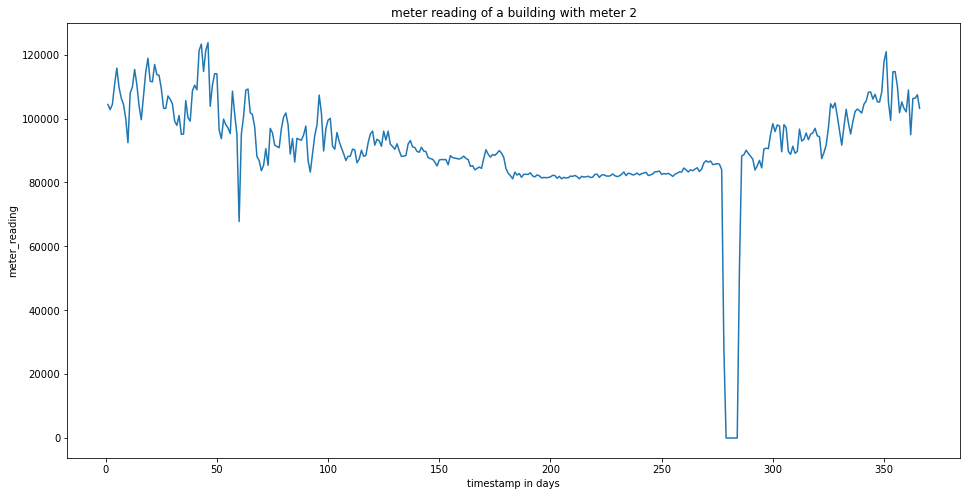

In [51]:
id_building = 784#mention building id
meter_type = 2# mention meter type
q = whole_year_reading(id_building,meter_type)

The meter reading values of building784 are too low between 280 to 290 days.

# Summary of EDA :

1. Understanding the given train,test,weather,building data files.
2. Analysing each data file one by one by exploring each column in the data.
3. Reducing the size of the data by 53%.
4. Merging the data for further exploration and relation between columns.
5. Checking manually for any outliers or noise.
6. Checking the percentage of missing data in each file.


# Observations :

1. Each meter type has different distribution and has different ranges.
2. only one building(1099) is showing high values of meter reading compared to all other buildings.
3. Meter reading values are mostly distributed around zero.
4. Zero Meter reading values are due to incorrect measurements.
5. Wind speed in North direction is high compared to other directions.
6. steam consumption is more in the first half of the year.
7. Floor count is highly correlated with meter reading which is target variable than any other features.
8. cloud coverage values are ranging from 0 to 9.
9. site 7 has most electric meter than any other sites.
10. Constant or zero meter reading are appeared in few buildings which will be counted as outliers.
11. floor count,year_built,cloud coverage, precip depth,sea level pressure has more missing data.
12. Around 30% of buildings are for education purpose only.
13. Hot water consumption is less during the summer.